# Natural Language Processing; clasificando reseñas (Kaggle)


En este proyecto se pretenden clasificar los revies de Yelp (1 a 5 estrellas) basándonos en el contenido del texto de estos revies. Este proyecto usará meétodos preestablecidos (o pipelines) para las tareas mas complejas; en un proyecto posterior se buscará hacer esto desde "scratch" o desde cero.

Para este proyecto se utilizará la data obtenida en [El set de reviews de Yelp de Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Cada observación registrada en el dataset es una reseña o review de un negocio en particular por algún usuario.

La columna "stars" es el número de estrallas (1 a 5) asignada por el usuario al negocio. (Más estrellas es mejor). En otras palabras, es el rating del negocio dado por la persona que escribió la reseña.

La columna de "cool" es cuantos votos de "cool" fueron recibidos por otros usuarios. 

Todas las reseñas empiezan con 0 votos 0 "cool", no habiendo límites para estos. Es una reseña...de la reseña.

las columnas de útil y divertido ("useful" y "funny") son similares a las de "cool".


## Importando

In [1]:
import numpy as np
import pandas as pd

## Datos

**Se guardarán los datos en una variable llamada yelp**

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Se creara una cueva columna llamada "longitud del texto" que es el número de palabras en la columna de texto.**

In [6]:
yelp['longitud del texto'] = yelp['text'].apply(len)

# Análsis Exploratorio

## Importando herramientas para visualización

**Importamos los datos para visualización.**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Usamos FacetGrid de seaborn para crear 5 histograms de la longitud del texto por cantidad de estrellas.**

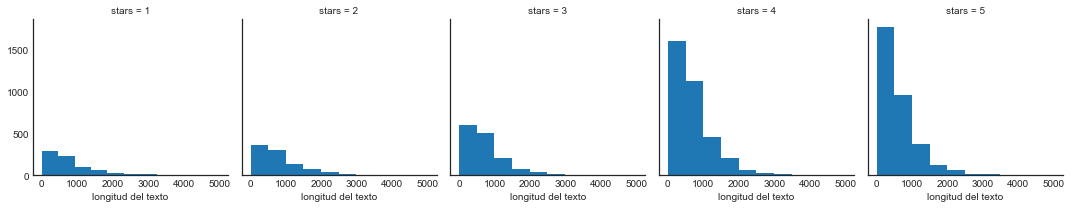

In [8]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'longitud del texto')

**Secrea un boxplot de la longitud por cada estrella.**

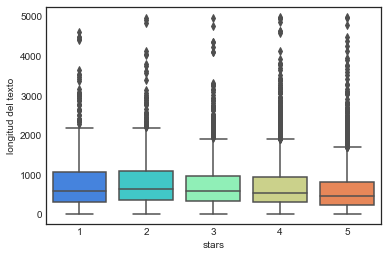

In [9]:
sns.boxplot(x='stars',y='longitud del texto',data=yelp,palette='rainbow')

**Creamos un countplot para contar las ocurrencias de cada una de las instancias de cada caso (cuantos valores hay por cada estrella o categoría).**

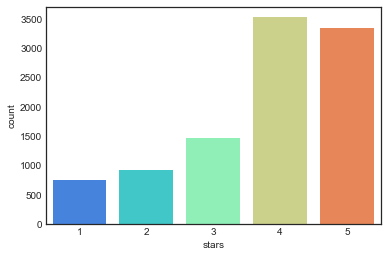

In [10]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

** Usamos groupby para obtener los valores promedios de las columnas numericas, este dataframe se crea así:**

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,longitud del texto
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Ussmos corr() en nuestro groupby dataframe para obtener otro (un nuevo), dataframe:**

In [12]:
stars.corr()

,cool,useful,funny,longitud del texto
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
longitud del texto,-0.857664,0.699881,0.843461,1.000000


**Ahora se usa seaborn para crear un heatmap de nuestro .corr() dataframe correlacionado:**

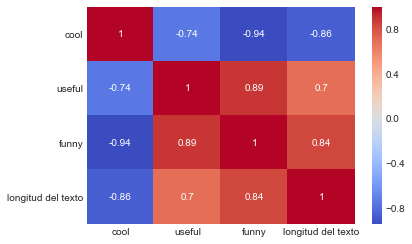

In [13]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## Clasificando 

Se realizará ahora la tarea de la clasificación. Para hacer las cosas mas fáciles, se tomarán aquellas reseñas que tuvieron o bien 5 estrellas o sólo una.

**Creamos un dataframe llamado yelp_clas que contenga las columnas del dataframe yelp pero solo para reseñas con 1 ó 5 estrellas.**

In [14]:
yelp_clas = yelp[(yelp.stars==1) | (yelp.stars==5)]

** Creamos dos objetos X & y. X será la columna de texto 'text' de yelp_clas, mientras que y será la columna de estrellas. (target/etiquetas)**

In [15]:
X = yelp_clas['text']
y = yelp_clas['stars']

**Importamos CountVectorizer y creamos un objeto CountVectorizer.**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Usamos (como siempre) el método fit_transform en el objeto CountVectorizer y pasamos la columna X (la de 'text' ). Este nuevo resultado lo guardamos en nuestra X.**

In [17]:
X = cv.fit_transform(X)

## Separación de conjuntos de entrenamiento y prueba

** Usamos train_test_split para separar los datos en X_train, X_test, y_train, y_test. (test_size=0.3 y random_state=101) **

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Entrenando el modelo

** Importamos MultinomialNB y creamos una instancia del estimador llamado nb **

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Ahora ajutamos y entrenamos nb usando el conjunto de entrenamiento.**

In [21]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predicciones y Evaluaciones

**Usamos predict en nb to para comparar con los resultados de X_test.**

In [22]:
predicc = nb.predict(X_test)

** Creamos una matriz de conf. y un repote de clasificación usando nuestros resultados y_test **

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,predicc))
print('\n')
print(classification_report(y_test,predicc))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



# Usando el procesamiento de texto

** Importamos TfidfTransformer de sklearn. **

In [25]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Importamos el Pipeline (cartera o portafolio; conjunto con todas las características) de sklearn. **

In [26]:
from sklearn.pipeline import Pipeline

** Ahora se crea un pipeline con los siguientes pasos: CountVectorizer (), TfidfTransformer (), MultinomialNB () **

In [27]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

## Usando el Pipeline

** ¡Hora de usar el pipeline! Este ya tiene todos los pasos previos al proceso, lo que significa que se necesia volver a dividir los datos originales (Se sobrescribe X como la versión de CountVectorized. Se necesita solo el texto) **

### Separación de conjuntos de entrenamiento y pruebca

**Realizamos de nuevo la separación en el objeto yelp_class.**

In [28]:
X = yelp_clas['text']
y = yelp_clas['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

** Ahora ajustamos con los datos de entrenamiento. No se puede usar los mismos datos de entrenamiento que la última vez porque esos datos ya se han vectorizado. Se necesita pasar solo el texto y las etiquetas **

In [29]:
# Tarda bastante
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predicciones y Evaluación

** Ahora se usa el pipeline para predecir a partir de X_test y se crea un informe de clasificación y una matriz de confusión...Hay algunos resultados extraños y un warning. **

In [30]:
pred = pipeline.predict(X_test)

In [31]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Tf-Idf realmente empeoró las cosas, aunque no esta mal el reultado

** Algunas otras cosas para probar ... **
Se intentará volver atrás y jugar con los pasos del pipeline y ver si la creación de un analizador personalizado como en el otro proyecto ayuda (nota: probablemente no sea así). O se puede recrear el pipeline con un solo CountVectorizer () y NaiveBayes. ¿Cambiar el modelo ML al final a otro clasificador ayuda en absoluto?

# Mario Duran